In [1]:
# Pkg.add("QuadGK")
using QuadGK
using Polynomials

<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [3]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [105]:
function Legendre(k, x)
    if k == 0
        return 1
    end
    if k == 1
        return x
    end
    return ((2*k-1) / k) * x * Legendre(k-1, x) - ((k-1) / k) * Legendre(k-2, x)
end

Legendre (generic function with 1 method)

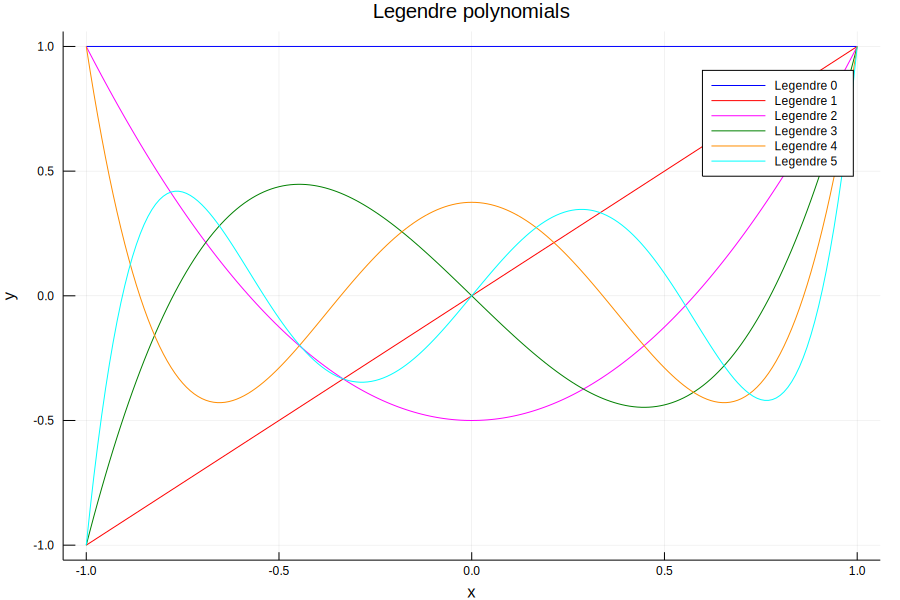

In [106]:
using Plots

xs = -1:0.01:1
l_0 = [Legendre(0, x_i) for x_i in xs]
l_1 = [Legendre(1, x_i) for x_i in xs]
l_2 = [Legendre(2, x_i) for x_i in xs]
l_3 = [Legendre(3, x_i) for x_i in xs]
l_4 = [Legendre(4, x_i) for x_i in xs]
l_5 = [Legendre(5, x_i) for x_i in xs]


plot(xs, l_0, label = "Legendre 0", xlabel = "x", ylabel = "y", title = "Legendre polynomials", color = "blue", size=(900,600))
plot!(xs, l_1, label = "Legendre 1", color = "red")
plot!(xs, l_2, label = "Legendre 2", color = "magenta")
plot!(xs, l_3, label = "Legendre 3", color = "green")
plot!(xs, l_4, label = "Legendre 4", color = "dark orange")
plot!(xs, l_5, label = "Legendre 5", color = "aqua")

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [107]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a) = gauss(Float64, 3)

([-0.774597, 0.0, 0.774597], [0.555556, 0.888889, 0.555556])

In [108]:
f1(x) = x^2
s1 = sum(a .* f1.(xp))

0.6666666666666667

In [109]:
f2(x) = x^3
s2 = sum(a .* f2.(xp))

0.0

In [110]:
f3(x) = x^4
s3 = sum(a .* f3.(xp))

0.4000000000000001

In [111]:
f4(x) = x^5
s4 = sum(a .* f4.(xp))

0.0

In [112]:
f5(x) = x^6
s5 = sum(a .* f5.(xp))

0.24000000000000007

In [113]:
f6(x) = x^7
s6 = sum(a .* f6.(xp))

0.0

In [114]:
f7(x) = x^8
s7 = sum(a .* f7.(xp))

0.14400000000000007

Wniosek:
Funkcja przestaje być dokładna dla wielomianu stopnia 2n-1 oraz wielomianów wyższych stopni.

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [115]:
function compute_gauss(fun, k)
    (xp,ca) = gauss(Float64, k)
    sum(a .* fun.(xp))
end

function normalize(fun, a, b)
    return x -> fun((b+a)/2 + (b-a)*x/2)*((b-a)/2)
end

function generic_integral(fun, a, b, k)
    g = normalize(fun, a, b)
    compute_gauss(g, k)
end

generic_integral (generic function with 1 method)

In [116]:
f(x) = x^2
generic_integral(f, -2, 1, 3)

3.0

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [117]:
f(x) = x^6+x^2+18*x+3
quadgk(f, -5, 5)

(22434.7619047619, 1.0913936421275139e-11)

In [118]:
f(x) = 1/sqrt(2*pi)*exp((-x^2)/2)
quadgk(f, -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.